#### ANÁLISE DOS DADOS DE CANCELAMENTO DE MATRÍCULA DE UMA UNIVERSIDADE ####

In [291]:
# importações

import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [292]:
# Carregando a base de dados
df_cancelamentos = pd.read_excel(r'C:\projetos\Analise-de-cancelamentos-de-matricula-de-universidade\dados\base-cancelamentos-tratada.xlsx', sheet_name='dados')
#df_cancelamentos = pd.read_excel(r'C:\projetos\Analise-de-cancelamentos-de-matricula-de-universidade\dados\base-cancelamentos-tratada.xlsx', sheet_name='ajustados')

In [293]:
# visualizando uma amostra dos dados
df_cancelamentos.sample(10)

,data_protocolo,sexo,data_nascimento,campus,motivo_cancelamento,curso,area,tipo_ingresso,pontuacao,ano_ingresso,grupo
628,09/02/2023,Feminino,23/03/2000,Macaé,Outros,ODONTOLOGIA,Humanas,SISU,725.00,2020,GRUPO B
1179,01/10/2025,Feminino,11/12/1984,Juiz de Fora,Falta de identificação e/ou interesse pelo curso,CIÊNCIAS CONTÁBEIS,Humanas,SISU,519.08,2022,GRUPO A
84,07/11/2022,Feminino,07/05/2003,Juiz de Fora,Não especificado,NUTRIÇÃO,Saúde,SISU,693.26,2021,GRUPO C
205,17/04/2023,Masculino,29/04/1995,Juiz de Fora,Não especificado,CIÊNCIA DA COMPUTAÇÃO,Exatas,SISU,705.78,2014,GRUPO C
547,02/03/2023,Feminino,04/02/2003,Juiz de Fora,Outros,FISIOTERAPIA,Saúde,SISU,741.84,2022,GRUPO C
1139,18/11/2024,Feminino,30/12/1998,Juiz de Fora,Falta de identificação e/ou interesse pelo curso,FÍSICA,Exatas,SISU,672.52,2024,GRUPO C
304,12/09/2023,Masculino,12/09/2004,Macaé,Não especificado,ADMINISTRAÇÃO,Humanas,SISU,534.28,2023,GRUPO C
1107,20/09/2024,Masculino,15/03/1996,Juiz de Fora,Dificuldade de conciliar trabalho com estudo,LICENCIATURA EM COMPUTAÇÃO - UAB - PÓLO DE CAMBUÍ,Exatas,VESTIBULAR,91.66,2024,GRUPO C
231,09/02/2023,Masculino,15/03/2000,Juiz de Fora,Não especificado,FÍSICA,Exatas,SISU,603.26,2018,GRUPO B
702,07/08/2023,Masculino,03/01/2001,Juiz de Fora,Outros,MEDICINA,Saúde,SISU,789.44,2023,GRUPO E


In [294]:
# verificando os tipos de dados
df_cancelamentos.dtypes

data_protocolo          object
sexo                    object
data_nascimento         object
campus                  object
motivo_cancelamento     object
curso                   object
area                    object
tipo_ingresso           object
pontuacao              float64
ano_ingresso             int64
grupo                   object
dtype: object

In [295]:
# Removendo o espaço
variaveis = ['data_protocolo', 'sexo', 'data_nascimento','campus', 'motivo_cancelamento',
             	'curso','area',	'tipo_ingresso', 'grupo'
            ]
for variavel in variaveis:
    df_cancelamentos[variavel] = df_cancelamentos[variavel].apply(lambda x: x.lstrip()).apply(lambda x: x.rstrip())

In [296]:
# Verificando os valores únicos da variável sexo
print(f"Itens únicos de SEXO: {df_cancelamentos['sexo'].unique()}")

Itens únicos de SEXO: ['Masculino' 'Feminino']


In [297]:
# Verificando os valores únicos da variável campus
print(f"Itens únicos de CAMPUS: {df_cancelamentos['campus'].unique()}")

Itens únicos de CAMPUS: ['Juiz de Fora' 'Macaé']


In [298]:
# Verificando os valores únicos da variável grupo
print(f"Itens únicos de GRUPO: {df_cancelamentos['grupo'].unique()}")

Itens únicos de GRUPO: ['GRUPO A' 'GRUPO C' 'Não se aplica' 'GRUPO D' 'GRUPO B' 'GRUPO E'
 'GRUPO D1' 'ESCOLA PUBLICA' 'FUNCIONARIOS BB  ADMINISTRAÇÃO'
 'DEMANDA SOCIAL' 'GRUPO A1' 'GRUPO E1' 'GRUPO B1' 'GRUPO J' 'GRUPO G']


In [299]:
# Verificando os valores únicos da variável grupo
print(f"Itens únicos de MOTIVO DO CANCELAMENTO: {df_cancelamentos['motivo_cancelamento'].unique()}")

Itens únicos de MOTIVO DO CANCELAMENTO: ['Não especificado' 'Outros' 'Falecimento'
 'Falta de identificação e/ou interesse pelo curso' 'Horário das aulas'
 'Dificuldade de conciliar trabalho com estudo'
 'Dificuldade de morar longe da família'
 'Problema de relacionamento com estudantes e/ou docentes'
 'Alto índice de reprovação' 'Dificuldades financeiras'
 'Ingresso em outra instituição / curso' 'Infraestrutura do Campus'
 'Má qualidade do curso' 'Problema de saúde']


In [300]:
# Verificando os valores únicos da variável tipo_ingresso
print(f"Itens únicos de TIPO DE INGRESSO: {df_cancelamentos['tipo_ingresso'].unique()}")

Itens únicos de TIPO DE INGRESSO: ['SISU' 'PISM' 'VESTIBULAR' 'Matrícula como Graduado'
 'Opcao segundo ciclo do Bacharelado Ciencias Exatas'
 'Opcao segundo ciclo do B. I.  em Ciencias Humanas' 'Disciplina Isolada'
 'Seleção/Especialização' 'Transferência Obrigatória'
 'Opcao segundo ciclo do B. I.  em Artes de Design' 'Transferência'
 'Seleção/Aperfeiçoamento' 'Seleção/Mestrado'
 'CV/Nova Modalidade/Habilitação' 'CV/Vaga de Edital'
 'Nova Modalidade/Habilitação' 'Mudança de Curso' 'PARFOR']


In [301]:
# Verificando os valores únicos da variável tipo_ingresso
print(f"Itens únicos de ANO DE INGRESSO: {df_cancelamentos['ano_ingresso'].unique()}")

Itens únicos de ANO DE INGRESSO: [2022 2011 2012 2019 2020 2018 2021 2016 2023 2006 2015 2017 1127 2013
 2008 2010 2014 1119 1123 2007 1020 1203 1115 2005 1126 2001 1986 2002
 2024]


In [302]:
# verificando quantos registros e variáveis presentes
df_cancelamentos.shape

(1217, 11)

In [303]:
# filtrando dados somente pelos pedidos de cancelamento de matrículas da graduação e excluindo pedido de disciplina isolada
df_cancelamentos = df_cancelamentos.loc[df_cancelamentos['ano_ingresso'] > 2000, :]
df_cancelamentos = df_cancelamentos.loc[df_cancelamentos['tipo_ingresso'] != 'Disciplina Isolada', :]

In [304]:
# verificando quantos registro e variáveis presentes após filtragem
df_cancelamentos.shape

(1204, 11)

In [305]:
# verificando se existem valores ausentes
df_cancelamentos.isnull().sum()

data_protocolo         0
sexo                   0
data_nascimento        0
campus                 0
motivo_cancelamento    0
curso                  0
area                   0
tipo_ingresso          0
pontuacao              0
ano_ingresso           0
grupo                  0
dtype: int64

## Analisando os dados dos cancelamentos de matrícula

#### 1. Perfil dos Estudantes que Cancelaram a Matrícula de graduação


In [306]:
# Distribuição por Sexo: Percentual de cancelamentos por sexo
contagem_sexo = df_cancelamentos['sexo'].value_counts()
total_sexo = contagem_sexo.sum()
percentual_sexo = (contagem_sexo / total_sexo) * 100

print(f'Percentual: {contagem_sexo}')
print(f'\nContagem: {percentual_sexo}')


Percentual: sexo
Feminino     662
Masculino    542
Name: count, dtype: int64

Contagem: sexo
Feminino     54.983389
Masculino    45.016611
Name: count, dtype: float64


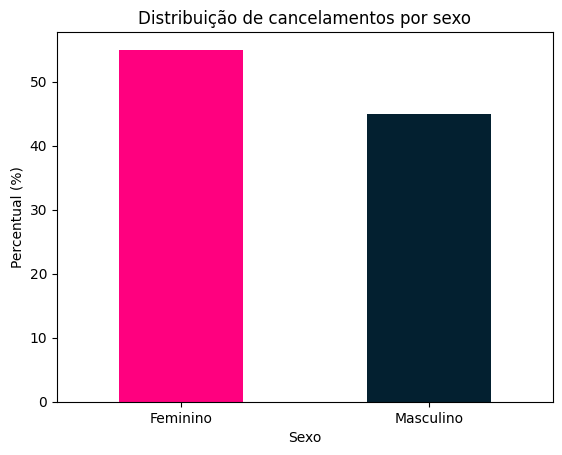

In [307]:
# Gráfico da Distribuição de cancelamento por sexo
percentual_sexo.plot(kind= 'bar',  color=['#FF007F', '#032030'])
plt.title('Distribuição de cancelamentos por sexo')
plt.xlabel('Sexo')
plt.ylabel('Percentual (%)')
plt.xticks(rotation=0)
plt.show()

In [308]:
## CONCLUSÕES
# Podemos concluir, de acordo com a análise, que pessoas do sexo feminino (certa de 10% ou 118) cancelaram mais suas matrícula

In [309]:
# Analisando se estudantes de ingressos mais recentes ou mais antigos têm maior propensão ao cancelamento

df_ano = df_cancelamentos['ano_ingresso']
print(df_cancelamentos['ano_ingresso'].value_counts().sort_values(ascending=False))

ano_ingresso
2023    308
2022    231
2024    203
2021    111
2020    102
2019     63
2018     52
2017     39
2016     26
2015     19
2014     14
2012     10
2013      8
2011      5
2006      4
2010      3
2008      2
2007      1
2005      1
2001      1
2002      1
Name: count, dtype: int64


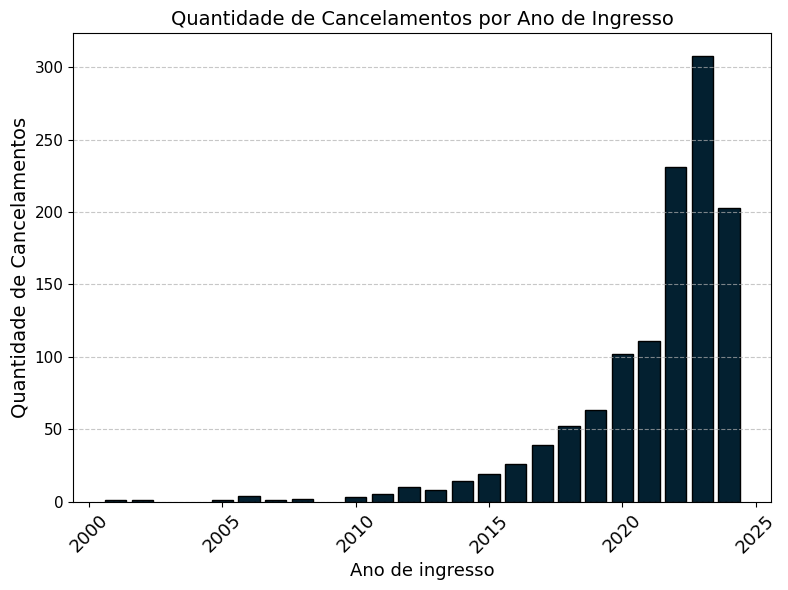

In [310]:
# Contar os cancelamentos por ano
cancelamentos_por_ano_ingresso = df_ano.value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_ano_ingresso.index  # Anos
y = cancelamentos_por_ano_ingresso.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Quantidade de Cancelamentos por Ano de Ingresso', fontsize=14)
plt.xlabel('Ano de ingresso', fontsize=13)
plt.ylabel('Quantidade de Cancelamentos', fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()



# Exibir o gráfico
plt.show()

In [311]:
## CONCLUSÕES
# Podemos observar um aumento progressivo de acordo com o ano de ingresso, culminando no ano de 2023, onde aconteceu 303 pedidos. 
# Um aumento de cerca de 35% em relação as pessoas que ingressaram no ano anterior

#### Análisando a quantidade de cancelamentos por idade 

In [312]:
# Transformando o tipo da variável ano_nascimento para data e criando a variável ano_nascimento
df_cancelamentos['idade'] = pd.to_datetime(df_cancelamentos['data_protocolo'],format="%d/%m/%Y").dt.year - pd.to_datetime(df_cancelamentos['data_nascimento'],format="%d/%m/%Y").dt.year 
df_cancelamentos.head()

,data_protocolo,sexo,data_nascimento,campus,motivo_cancelamento,curso,area,tipo_ingresso,pontuacao,ano_ingresso,grupo,idade
0,09/08/2022,Masculino,23/09/2003,Juiz de Fora,Não especificado,CIÊNCIAS ECONÔMICAS,Humanas,SISU,647.00,2022,GRUPO A,19
1,14/09/2022,Feminino,24/01/2004,Juiz de Fora,Não especificado,TURISMO,Humanas,SISU,633.86,2022,GRUPO C,18
2,05/08/2022,Feminino,22/12/2003,Juiz de Fora,Não especificado,NUTRIÇÃO,Saúde,PISM,521.50,2022,GRUPO C,19
3,29/09/2023,Feminino,19/07/1983,Macaé,Não especificado,GEOGRAFIA,Humanas,VESTIBULAR,41.10,2011,Não se aplica,40
4,02/08/2022,Masculino,02/11/1974,Macaé,Não especificado,DIREITO,Humanas,VESTIBULAR,69.80,2012,Não se aplica,48


In [313]:
# Transformando o tipo da variável data_protocolo para data e criando a variável ano_protocolado
df_cancelamentos['ano_protocolado'] = pd.to_datetime(df_cancelamentos['data_protocolo'],format="%d/%m/%Y").dt.year
df_cancelamentos.head()

,data_protocolo,sexo,data_nascimento,campus,motivo_cancelamento,curso,area,tipo_ingresso,pontuacao,ano_ingresso,grupo,idade,ano_protocolado
0,09/08/2022,Masculino,23/09/2003,Juiz de Fora,Não especificado,CIÊNCIAS ECONÔMICAS,Humanas,SISU,647.00,2022,GRUPO A,19,2022
1,14/09/2022,Feminino,24/01/2004,Juiz de Fora,Não especificado,TURISMO,Humanas,SISU,633.86,2022,GRUPO C,18,2022
2,05/08/2022,Feminino,22/12/2003,Juiz de Fora,Não especificado,NUTRIÇÃO,Saúde,PISM,521.50,2022,GRUPO C,19,2022
3,29/09/2023,Feminino,19/07/1983,Macaé,Não especificado,GEOGRAFIA,Humanas,VESTIBULAR,41.10,2011,Não se aplica,40,2023
4,02/08/2022,Masculino,02/11/1974,Macaé,Não especificado,DIREITO,Humanas,VESTIBULAR,69.80,2012,Não se aplica,48,2022


In [314]:
# Alterando o tipo da variável ano_protocolado
df_cancelamentos['idade'] = df_cancelamentos['idade'].astype(str)

In [315]:
cancelamentos_por_idade = df_cancelamentos['idade'].value_counts()
cancelamentos_por_idade

idade
19    224
20    144
21    118
22    114
18    107
24     75
23     75
26     53
25     48
27     32
29     21
30     20
28     15
32     14
31     12
34     11
35     11
41     11
38     10
39     10
37      9
33      9
42      8
40      6
43      6
48      5
44      5
49      4
36      4
45      2
56      2
55      2
51      2
47      2
52      2
64      2
69      1
71      1
65      1
59      1
66      1
46      1
62      1
53      1
50      1
Name: count, dtype: int64

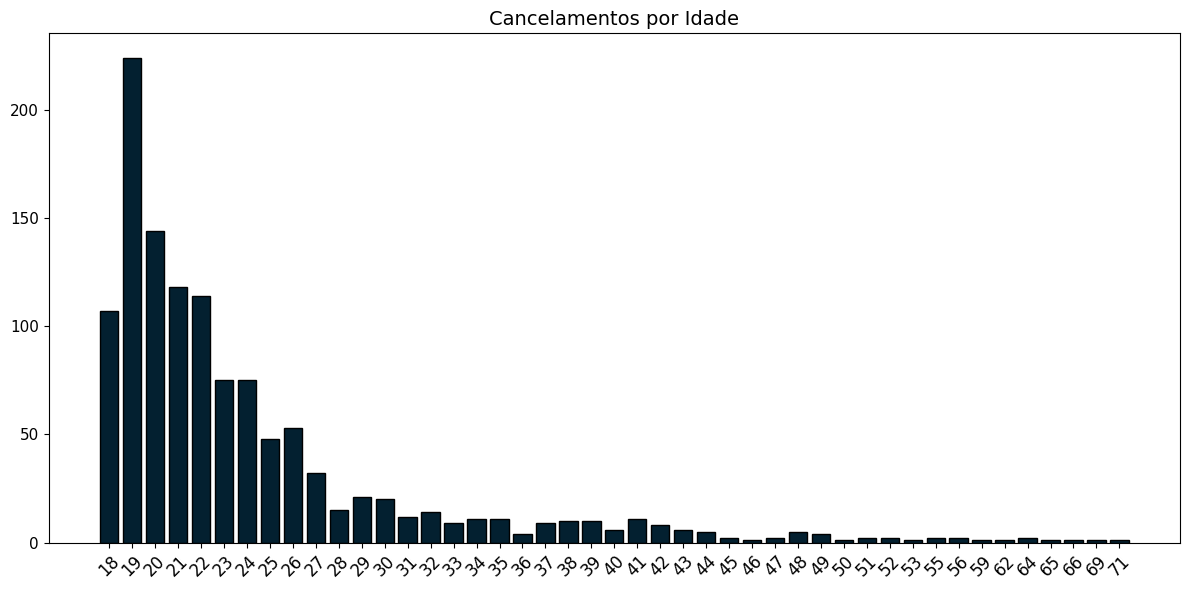

In [316]:
# Contar os cancelamentos por ano de solicitação
cancelamentos_por_idade = df_cancelamentos['idade'].value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_idade.index  # Anos
y = cancelamentos_por_idade.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(12, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Cancelamentos por Idade', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=11)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [317]:
## CONCLUSÔES
# POdemos concluir que os alunos que pediram mais cancelamentos tem a idade de 19 anos, seguido de 20 e 21

### Qual o tipo de ingresso (vestibular, transferência) mais comum entre os alunos que cancelam?


In [318]:
df_cancelamentos.groupby(['tipo_ingresso']).size().sort_values(ascending=False)

tipo_ingresso
SISU                                                  709
PISM                                                  291
VESTIBULAR                                            121
Matrícula como Graduado                                21
Opcao segundo ciclo do B. I.  em Ciencias Humanas      14
Nova Modalidade/Habilitação                            14
Opcao segundo ciclo do B. I.  em Artes de Design       13
Opcao segundo ciclo do Bacharelado Ciencias Exatas      8
CV/Nova Modalidade/Habilitação                          4
Transferência                                           3
Transferência Obrigatória                               3
CV/Vaga de Edital                                       1
Mudança de Curso                                        1
PARFOR                                                  1
dtype: int64

In [319]:
# CONCLUSÕES
# Verificamos que ingressante pelo SISU possuem mais que o dobro de cancelamentos pdo que o segundo que é o PISW

#### Análisando a quantidade de cancelamentos por ano 

In [320]:
# Alterando o tipo da variável ano_protocolado
df_cancelamentos['ano_protocolado'] = df_cancelamentos['ano_protocolado'].astype(str)

In [321]:
cancelamentos_por_ano_protocolado = df_cancelamentos['ano_protocolado'].value_counts()
cancelamentos_por_ano_protocolado

ano_protocolado
2023    552
2024    414
2022    193
2025     45
Name: count, dtype: int64

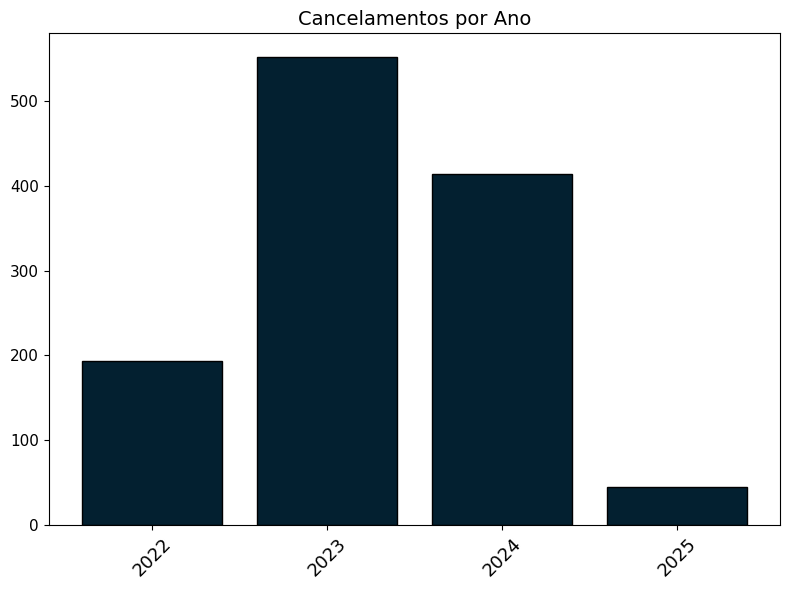

In [322]:
# Contar os cancelamentos por ano de solicitação
cancelamentos_por_ano_protocolado = df_cancelamentos['ano_protocolado'].value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_ano_protocolado.index  # Anos
y = cancelamentos_por_ano_protocolado.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Cancelamentos por Ano', fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=11)
plt.tight_layout()



# Exibir o gráfico
plt.show()

#### 2. Razões para o Cancelamento

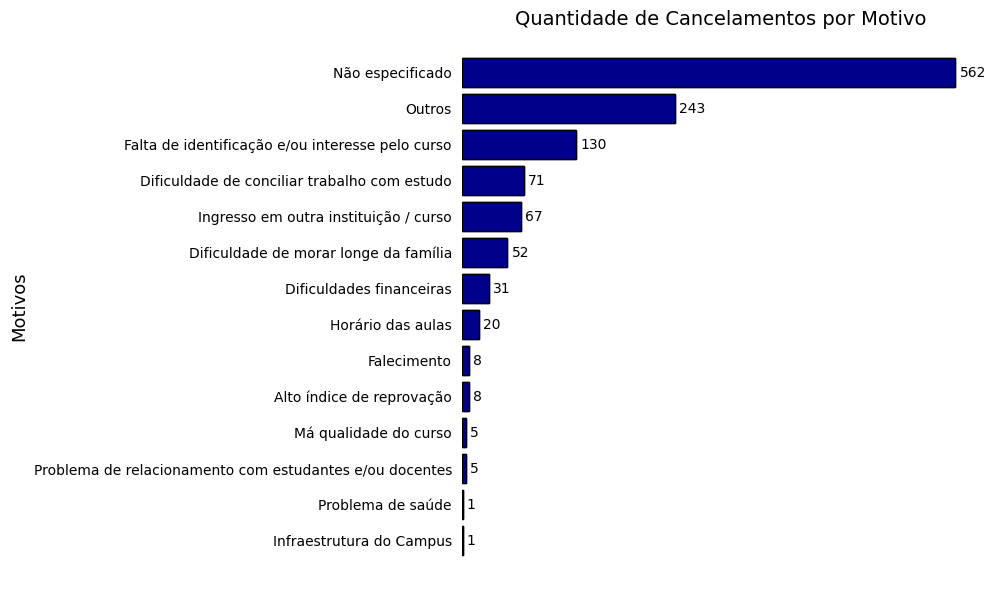

In [323]:
# Verificar e garantir que a coluna está corretamente processada

# Contar os cancelamentos por motivo
cancelamentos_por_motivo = df_cancelamentos['motivo_cancelamento'].value_counts()

# Ordenar pela quantidade de cancelamentos em ordem decrescente
cancelamentos_por_motivo = cancelamentos_por_motivo.sort_values(ascending=True)

# Dados para o gráfico
x = cancelamentos_por_motivo.index  # Motivos
y = cancelamentos_por_motivo.values  # Quantidade de cancelamentos por motivo

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Quantidade de Cancelamentos por Motivo', fontsize=14, loc='center')
plt.xlabel('Quantidade', fontsize=13)
plt.ylabel('Motivos', fontsize=13)

bars = plt.barh(x, y, color='darkblue', edgecolor='black')

# Adicionar rótulos de dados diretamente nas barras
plt.bar_label(bars, fmt='%d', padding=3, fontsize=10, label_type='edge')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_ticks_position('none')


plt.tight_layout()

# Exibir o gráfico
plt.show()


In [324]:
## CONCLUSÕES
# Através do gráfico, verificamos que a maioria das pessoas não especificou o motivo do seu ncancelamento
# Mais tarde iremos realizar outra análise sem levar em consideração outros e Não especificado

### Cancelamento por Campus

In [325]:
# Verificando a quantidade de cancelamentos por Campus
df_cancelamentos['campus'].value_counts()

campus
Juiz de Fora    1048
Macaé            156
Name: count, dtype: int64

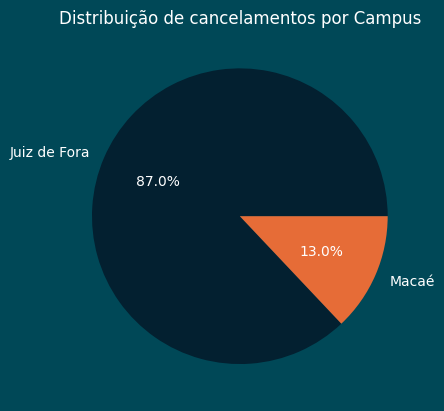

In [326]:
contagem_cidades = df_cancelamentos['campus'].value_counts()

# Mudar a cor do plano de fundo diretamente
plt.gcf().set_facecolor('#004857')  # Cor de fundo (exemplo: azul claro)

plt.pie(contagem_cidades, labels=contagem_cidades.index, colors=['#032030','#E66C37'], autopct= '%1.1f%%', textprops={'color':'white'})
plt.title('Distribuição de cancelamentos por Campus',color = 'white')
plt.show()

### Razões por Campus, Curso ou Área: Identificar se algum curso, área ou campus possui motivos predominantes.

In [327]:
# Razões por Campus - Juiz de Fora

df_razoes_campus_jf = df_cancelamentos[df_cancelamentos['campus'] == 'Juiz de Fora'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_campus_jf.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)
df_razoes_campus_jf

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento por Campus - Juiz de Fora</h3>{df_razoes_campus_jf.to_html(index=False)}"))

Motivos para o cancelamento,Total
Não especificado,465
Outros,225
Falta de identificação e/ou interesse pelo curso,119
Dificuldade de conciliar trabalho com estudo,65
Ingresso em outra instituição / curso,60
Dificuldade de morar longe da família,42
Dificuldades financeiras,29
Horário das aulas,17
Falecimento,8
Alto índice de reprovação,7


In [328]:
# Razões por Campus - Macaé

df_razoes_campus_macae = df_cancelamentos[df_cancelamentos['campus'] == 'Macaé'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_campus_macae.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento por Campus - Macaé</h3>{df_razoes_campus_macae.to_html(index=False)}"))

Motivos para o cancelamento,Total
Não especificado,97
Outros,18
Falta de identificação e/ou interesse pelo curso,11
Dificuldade de morar longe da família,10
Ingresso em outra instituição / curso,7
Dificuldade de conciliar trabalho com estudo,6
Horário das aulas,3
Dificuldades financeiras,2
Alto índice de reprovação,1
Infraestrutura do Campus,1


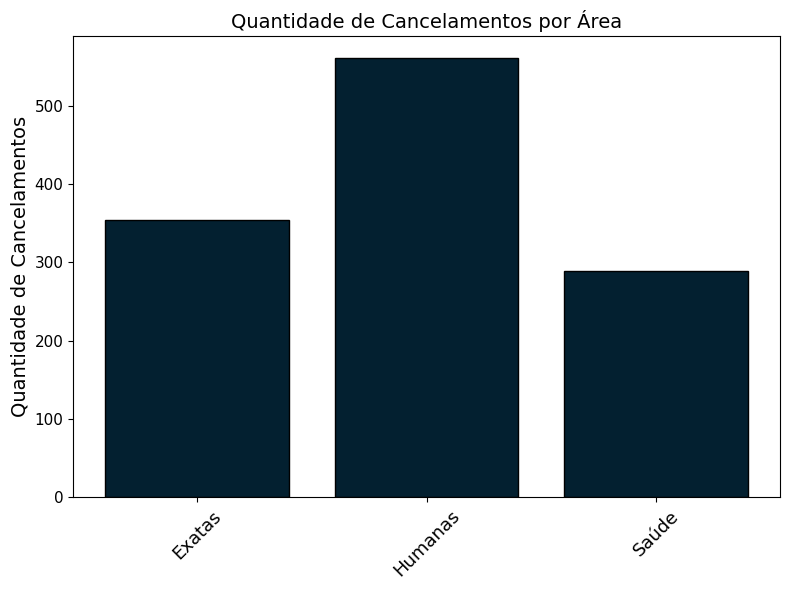

In [329]:
# Contar os cancelamentos por Área
cancelamentos_por_area = df_cancelamentos['area'].value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_area.index  # Anos
y = cancelamentos_por_area.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Quantidade de Cancelamentos por Área', fontsize=14)
plt.ylabel('Quantidade de Cancelamentos', fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=11)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [330]:
# Razões por Área - Humanas

df_razoes_area_humanas = df_cancelamentos[df_cancelamentos['area'] == 'Humanas'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_humanas.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)
# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Humanas</h3>{df_razoes_area_humanas.to_html(index=False)}"))

Motivos para o cancelamento,Total
Não especificado,257
Outros,120
Falta de identificação e/ou interesse pelo curso,61
Dificuldade de conciliar trabalho com estudo,36
Ingresso em outra instituição / curso,27
Dificuldade de morar longe da família,24
Dificuldades financeiras,15
Horário das aulas,10
Má qualidade do curso,4
Problema de relacionamento com estudantes e/ou docentes,4


In [331]:
# Razões por Área - Exatas

df_razoes_area_exatas = df_cancelamentos[df_cancelamentos['area'] == 'Exatas'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_exatas.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Exatas</h3>{df_razoes_area_exatas.to_html(index=False)}"))

Motivos para o cancelamento,Total
Não especificado,159
Outros,71
Falta de identificação e/ou interesse pelo curso,41
Dificuldade de conciliar trabalho com estudo,23
Ingresso em outra instituição / curso,18
Dificuldade de morar longe da família,16
Dificuldades financeiras,9
Horário das aulas,7
Alto índice de reprovação,5
Falecimento,3


In [332]:
# Razões por Área - Saúde

df_razoes_area_saude = df_cancelamentos[df_cancelamentos['area'] == 'Saúde'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_saude.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Saúde</h3>{df_razoes_area_saude.to_html(index=False)}"))

Motivos para o cancelamento,Total
Não especificado,146
Outros,52
Falta de identificação e/ou interesse pelo curso,28
Ingresso em outra instituição / curso,22
Dificuldade de morar longe da família,12
Dificuldade de conciliar trabalho com estudo,12
Dificuldades financeiras,7
Alto índice de reprovação,3
Horário das aulas,3
Falecimento,2


In [333]:
# # Razões por Curso - Top 10
df_razoes_curso = df_cancelamentos[['curso','motivo_cancelamento']].groupby(['curso']).size().reset_index(name='total').sort_values(by=['total','curso'], ascending=[False,False])
df_razoes_curso.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total','curso':'Curso','area':'Área'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Top 15 Cursos com mais Solicitações de cancelamento</h3>{df_razoes_curso.head(15).to_html(index=False)}"))

Curso,Total
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,81
DIREITO,73
ODONTOLOGIA,64
MEDICINA,57
NUTRIÇÃO,48
CIÊNCIAS EXATAS,47
FARMÁCIA,43
CIÊNCIAS ECONÔMICAS,38
ENFERMAGEM,29
QUÍMICA,27


In [334]:
# # Razões por Curso - Top 10
df_razoes_curso = df_cancelamentos[['area','curso','motivo_cancelamento']].groupby(['curso','area','motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total','curso'], ascending=[False,False])
df_razoes_curso.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total','curso':'Curso','area':'Área'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Top 10 Cursos com mais Solicitações de cancelamento</h3>{df_razoes_curso.head(10).to_html(index=False)}"))

Curso,Área,Motivos para o cancelamento,Total
DIREITO,Humanas,Não especificado,43
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,Humanas,Não especificado,36
NUTRIÇÃO,Saúde,Não especificado,33
MEDICINA,Saúde,Não especificado,29
FARMÁCIA,Saúde,Não especificado,25
CIÊNCIAS EXATAS,Exatas,Não especificado,20
QUÍMICA,Exatas,Não especificado,19
ODONTOLOGIA,Saúde,Não especificado,19
CIÊNCIAS ECONÔMICAS,Humanas,Não especificado,18
ADMINISTRAÇÃO,Humanas,Não especificado,17


In [335]:
# CONCLUSÕES
# Levando em consideração o panoram gera, verificamos que os as áreas dos alunos que mais solicitam cancelamento é aàrea de Humanas e o
# curso é o curso de Direito. 


##### Análise dos motivos de cancelamento excluindo os alunos que não declararam os motivos - Não especificado e Outros

In [336]:
df_cancelamentos_motivos = df_cancelamentos.loc[
    (df_cancelamentos['motivo_cancelamento'] != 'Não especificado') &
    (df_cancelamentos['motivo_cancelamento'] != 'Outros') ,:]
df_cancelamentos_motivos

,data_protocolo,sexo,data_nascimento,campus,motivo_cancelamento,curso,area,tipo_ingresso,pontuacao,ano_ingresso,grupo,idade,ano_protocolado
509,23/08/2022,Feminino,04/09/2004,Juiz de Fora,Falecimento,CIÊNCIAS ECONÔMICAS,Humanas,PISM,597.75,2022,GRUPO C,18,2022
512,26/08/2022,Feminino,25/09/1999,Juiz de Fora,Falta de identificação e/ou interesse pelo curso,HISTÓRIA,Humanas,SISU,723.60,2019,GRUPO C,23,2022
515,30/05/2023,Feminino,19/02/2005,Juiz de Fora,Falta de identificação e/ou interesse pelo curso,BACHARELADO EM ARTES VISUAIS,Humanas,PISM,523.75,2023,GRUPO E,18,2023
516,09/05/2023,Feminino,04/09/2004,Juiz de Fora,Falta de identificação e/ou interesse pelo curso,EDUCAÇÃO FÍSICA,Saúde,SISU,559.56,2023,GRUPO B,19,2023
517,26/04/2023,Feminino,29/08/2005,Macaé,Falta de identificação e/ou interesse pelo curso,ABI - HISTÓRIA,Humanas,PISM,746.50,2023,GRUPO C,18,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1208,28/01/2025,Masculino,12/05/2003,Juiz de Fora,Falta de identificação e/ou interesse pelo curso,OPÇÃO 2º CICLO CIÊNCIAS EXATAS - ENGENHARIA EL...,Exatas,SISU,644.16,2021,GRUPO E,22,2025
1211,29/01/2025,Masculino,09/10/2002,Juiz de Fora,Falta de identificação e/ou interesse pelo curso,ENGENHARIA DE PRODUÇÃO,Exatas,SISU,677.04,2020,GRUPO C,23,2025
1213,30/01/2025,Feminino,08/10/2004,Juiz de Fora,Alto índice de reprovação,NUTRIÇÃO,Saúde,PISM,735.25,2023,GRUPO C,21,2025
1214,30/01/2025,Masculino,14/10/2004,Juiz de Fora,Dificuldade de morar longe da família,ODONTOLOGIA,Saúde,SISU,729.72,2024,GRUPO C,21,2025


In [337]:
print(f'Total de cancelamentos: {df_cancelamentos.shape[0]}')
print(f'Total de cancelamentos com essas condições: {df_cancelamentos_motivos.shape[0]}')

Total de cancelamentos: 1204
Total de cancelamentos com essas condições: 399


In [338]:
# Quantidade de de cancelamentos por curso
df_cancelamentos_motivos[['curso','area']].groupby(['curso']).size().sort_values(ascending=False).head(20)

curso
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS    31
ODONTOLOGIA                                         23
DIREITO                                             18
CIÊNCIAS EXATAS                                     18
NUTRIÇÃO                                            13
CIÊNCIAS ECONÔMICAS                                 12
ENFERMAGEM                                          12
MEDICINA                                            12
GEOGRAFIA                                           11
FARMÁCIA                                            10
ENGENHARIA DE PRODUÇÃO                              10
CIÊNCIAS CONTÁBEIS                                   9
FISIOTERAPIA                                         8
FÍSICA                                               8
ABI - HISTÓRIA                                       8
CIÊNCIA DA COMPUTAÇÃO                                8
PEDAGOGIA                                            8
MEDICINA VETERINÁRIA                                 8
CINE

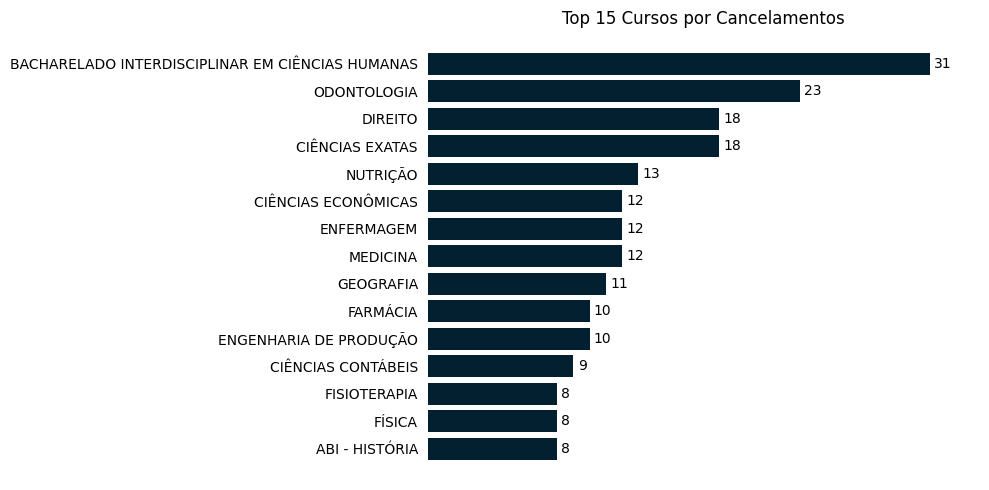

In [339]:
# Agrupar os dados e selecionar os 15 principais cursos com maior número de cancelamentos
top20_cancelamentos = (
    df_cancelamentos_motivos.groupby(['curso'])['curso']
    .count()
    .sort_values(ascending=False)
    .head(15)
)

# Criar o gráfico de barras horizontais
fig, ax = plt.subplots(figsize=(10, 5))  # Aumentar altura para melhor visualização
bar_container = ax.barh(top20_cancelamentos.index, top20_cancelamentos.values, color='#032030')

# Inverter a ordem das barras (maior para menor no topo)
ax.invert_yaxis()
ax.set_xticks([])
ax.tick_params(left=False, bottom=False)

# Remover as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Personalizar o gráfico
ax.set(
    title='Top 15 Cursos por Cancelamentos',
    xlim=(0, top20_cancelamentos.max() * 1.1)  # Ajustar o limite do eixo X para espaço extra
)
ax.bar_label(bar_container, fmt='{:,.0f}', label_type='edge', fontsize=10, padding=3)

plt.tight_layout()  # Ajustar layout para evitar sobreposição
plt.show()


In [340]:
# Razões por Campus - Juiz de Fora

df_razoes_campus_jf = df_cancelamentos_motivos[df_cancelamentos_motivos['campus'] == 'Juiz de Fora'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_campus_jf.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento por Campus - Juiz de Fora</h3>{df_razoes_campus_jf.to_html(index=False)}"))

Motivos para o cancelamento,Total
Falta de identificação e/ou interesse pelo curso,119
Dificuldade de conciliar trabalho com estudo,65
Ingresso em outra instituição / curso,60
Dificuldade de morar longe da família,42
Dificuldades financeiras,29
Horário das aulas,17
Falecimento,8
Alto índice de reprovação,7
Má qualidade do curso,5
Problema de relacionamento com estudantes e/ou docentes,5


In [341]:
# Razões por Campus - Macaé

df_razoes_campus_macae = df_cancelamentos_motivos[df_cancelamentos_motivos['campus'] == 'Macaé'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_campus_macae.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento por Campus - Macaé</h3>{df_razoes_campus_macae.to_html(index=False)}"))

Motivos para o cancelamento,Total
Falta de identificação e/ou interesse pelo curso,11
Dificuldade de morar longe da família,10
Ingresso em outra instituição / curso,7
Dificuldade de conciliar trabalho com estudo,6
Horário das aulas,3
Dificuldades financeiras,2
Alto índice de reprovação,1
Infraestrutura do Campus,1


### Cancelamentos por Área

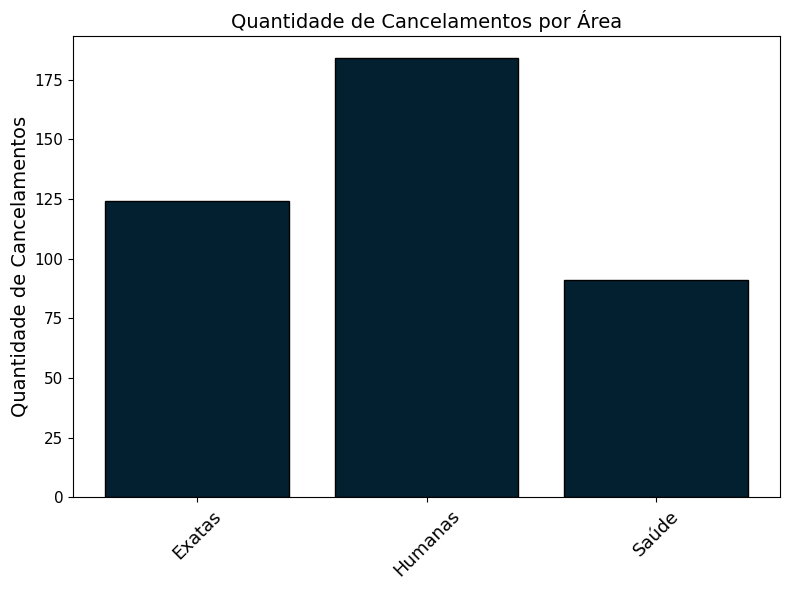

In [342]:
# Contar os cancelamentos por Área
cancelamentos_por_area = df_cancelamentos_motivos['area'].value_counts().sort_index()

# Dados para o gráfico
x = cancelamentos_por_area.index  # Anos
y = cancelamentos_por_area.values  # Quantidade de cancelamentos por ano

# Criar o gráfico de barras
plt.figure(figsize=(8, 6))
plt.bar(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Quantidade de Cancelamentos por Área', fontsize=14)
plt.ylabel('Quantidade de Cancelamentos', fontsize=14)
plt.xticks(rotation=45, fontsize=13)
plt.yticks(fontsize=11)
plt.tight_layout()

# Exibir o gráfico
plt.show()

In [343]:
# Razões por Área - Humanas

df_razoes_area_humanas = df_cancelamentos_motivos[df_cancelamentos_motivos['area'] == 'Humanas'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_humanas.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Humanas</h3>{df_razoes_area_humanas.to_html(index=False)}"))

Motivos para o cancelamento,Total
Falta de identificação e/ou interesse pelo curso,61
Dificuldade de conciliar trabalho com estudo,36
Ingresso em outra instituição / curso,27
Dificuldade de morar longe da família,24
Dificuldades financeiras,15
Horário das aulas,10
Má qualidade do curso,4
Problema de relacionamento com estudantes e/ou docentes,4
Falecimento,3


In [344]:
# Razões por Área - Exatas

df_razoes_area_exatas = df_cancelamentos_motivos[df_cancelamentos_motivos['area'] == 'Exatas'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_exatas.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Exatas</h3>{df_razoes_area_exatas.to_html(index=False)}"))

Motivos para o cancelamento,Total
Falta de identificação e/ou interesse pelo curso,41
Dificuldade de conciliar trabalho com estudo,23
Ingresso em outra instituição / curso,18
Dificuldade de morar longe da família,16
Dificuldades financeiras,9
Horário das aulas,7
Alto índice de reprovação,5
Falecimento,3
Má qualidade do curso,1
Problema de relacionamento com estudantes e/ou docentes,1


In [345]:
# Razões por Área - Saúde

df_razoes_area_saude = df_cancelamentos_motivos[df_cancelamentos_motivos['area'] == 'Saúde'].groupby(['motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total'], ascending=[False])
df_razoes_area_saude.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Área de Saúde</h3>{df_razoes_area_saude.to_html(index=False)}"))

Motivos para o cancelamento,Total
Falta de identificação e/ou interesse pelo curso,28
Ingresso em outra instituição / curso,22
Dificuldade de morar longe da família,12
Dificuldade de conciliar trabalho com estudo,12
Dificuldades financeiras,7
Alto índice de reprovação,3
Horário das aulas,3
Falecimento,2
Infraestrutura do Campus,1
Problema de saúde,1


In [346]:
# # Razões por Curso - Top 10
df_razoes_curso = df_cancelamentos_motivos[['curso','motivo_cancelamento']].groupby(['curso']).size().reset_index(name='total').sort_values(by=['total','curso'], ascending=[False,False])
df_razoes_curso.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total','curso':'Curso','area':'Área'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Top 15 Cursos com mais Solicitações de cancelamento</h3>{df_razoes_curso.head(15).to_html(index=False)}"))

Curso,Total
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,31
ODONTOLOGIA,23
DIREITO,18
CIÊNCIAS EXATAS,18
NUTRIÇÃO,13
MEDICINA,12
ENFERMAGEM,12
CIÊNCIAS ECONÔMICAS,12
GEOGRAFIA,11
FARMÁCIA,10


In [347]:
# # Razões por Curso - Top 10
df_razoes_curso = df_cancelamentos_motivos[['curso','motivo_cancelamento']].groupby(['curso','motivo_cancelamento']).size().reset_index(name='total').sort_values(by=['total','curso'], ascending=[False,False])
df_razoes_curso.rename(columns={'motivo_cancelamento':'Motivos para o cancelamento','total':'Total','curso':'Curso','area':'Área'}, inplace=True)

# Exibir com título
display(HTML(f"<h3>Motivos para o Cancelamento - Top 10 Cursos com mais Solicitações de cancelamento</h3>{df_razoes_curso.head(10).to_html(index=False)}"))

Curso,Motivos para o cancelamento,Total
CIÊNCIAS EXATAS,Falta de identificação e/ou interesse pelo curso,9
ODONTOLOGIA,Ingresso em outra instituição / curso,8
DIREITO,Falta de identificação e/ou interesse pelo curso,8
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,Ingresso em outra instituição / curso,8
BACHARELADO INTERDISCIPLINAR EM CIÊNCIAS HUMANAS,Falta de identificação e/ou interesse pelo curso,7
ODONTOLOGIA,Falta de identificação e/ou interesse pelo curso,6
NUTRIÇÃO,Falta de identificação e/ou interesse pelo curso,6
MEDICINA,Ingresso em outra instituição / curso,6
ENGENHARIA DE PRODUÇÃO,Falta de identificação e/ou interesse pelo curso,6
DIREITO,Dificuldade de morar longe da família,6


In [348]:
# verificando quantos registro existentes
df_cancelamentos.shape[0]

1204

In [349]:
# retirando da tabela os registros cujo grupo está prenchidos como não se aplica
df_cancelamentos_filtrada = df_cancelamentos.loc[df_cancelamentos['grupo'] != 'Não se aplica',:]

In [350]:
# verificando quantos registro existentestem agora após a remoção
df_cancelamentos_filtrada.shape[0]

1105

In [351]:
# verificando qual o total de registros agrupados por grupo e por tipo de ingresso
df_cancelamentos_filtrada.groupby(['tipo_ingresso','grupo']).size().sort_values(ascending=False).reset_index(name='total_registros')

,tipo_ingresso,grupo,total_registros
0,SISU,GRUPO C,399
1,PISM,GRUPO C,165
2,SISU,GRUPO A,99
3,SISU,GRUPO D,77
4,VESTIBULAR,GRUPO C,66
5,SISU,GRUPO B,64
6,SISU,GRUPO E,62
7,PISM,GRUPO E,57
8,PISM,GRUPO B,29
9,PISM,GRUPO D,20


In [352]:
# verificando qual o total de registros agrupados por grupo 
df_cancelamentos_filtrada.groupby(['grupo']).size().sort_values(ascending=False).reset_index(name='total_registros')

,grupo,total_registros
0,GRUPO C,630
1,GRUPO E,131
2,GRUPO A,124
3,GRUPO D,106
4,GRUPO B,98
5,GRUPO J,4
6,DEMANDA SOCIAL,3
7,GRUPO D1,2
8,ESCOLA PUBLICA,2
9,FUNCIONARIOS BB ADMINISTRAÇÃO,1


In [353]:
# CONCLUSÕES
# Verificamos que o grupo que apresentou expressivamente mais solicitações de cancelamento foi o Grupo C - Ampla concorrência, independentemente da declaração de renda, de escola, 
# de cor ou de origem racial seguido do Grupo E - Candidatos (as) que independentemente da renda tenham cursado integralmente o ensino médio em escolas públicas e Grupo A - 
# Candidatos (as) autodeclarados (as) pretos (as), pardos(as) ou indígenas, com renda familiar bruta per capita igual ou inferior a um
# salário mínimo e que tenham cursado integralmente o ensino médio em escolas públicas

### Recorte curso de Medicina

In [354]:
df_cancelamentos_medicina = df_cancelamentos.loc[df_cancelamentos['curso']=='MEDICINA',:]
df_cancelamentos_medicina.head()

,data_protocolo,sexo,data_nascimento,campus,motivo_cancelamento,curso,area,tipo_ingresso,pontuacao,ano_ingresso,grupo,idade,ano_protocolado
20,17/11/2022,Feminino,03/07/1985,Juiz de Fora,Não especificado,MEDICINA,Saúde,VESTIBULAR,187.00,2006,Não se aplica,37,2022
35,03/01/2023,Feminino,23/12/2002,Juiz de Fora,Não especificado,MEDICINA,Saúde,SISU,800.16,2022,GRUPO C,21,2023
40,08/05/2023,Feminino,03/05/2000,Juiz de Fora,Não especificado,MEDICINA,Saúde,SISU,809.80,2021,GRUPO C,23,2023
88,25/04/2023,Masculino,13/01/2000,Juiz de Fora,Não especificado,MEDICINA,Saúde,SISU,805.98,2021,GRUPO C,23,2023
89,07/03/2023,Feminino,30/01/2004,Macaé,Não especificado,MEDICINA,Saúde,PISM,1024.75,2022,GRUPO C,19,2023


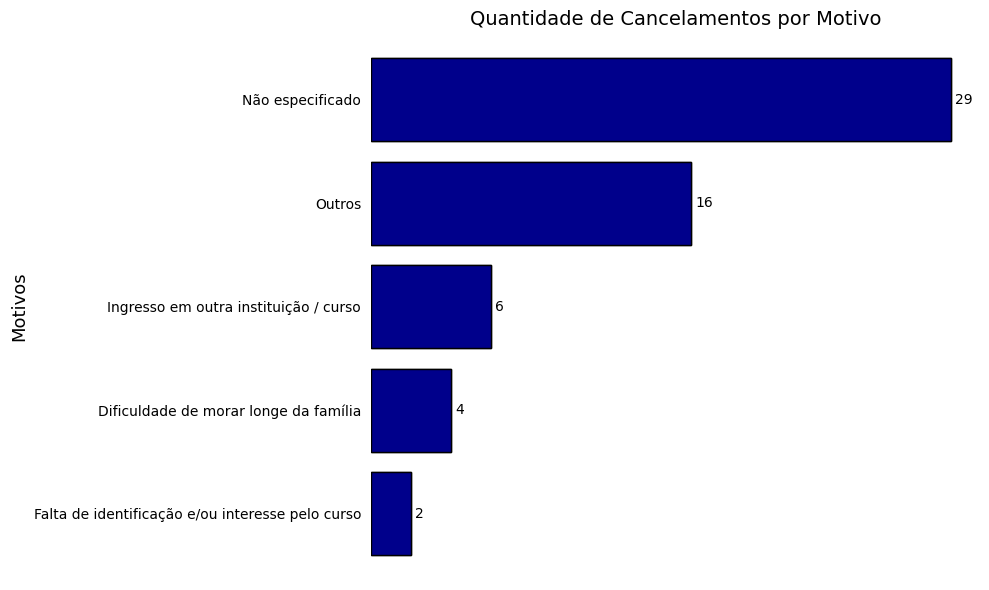

In [355]:
# Verificar e garantir que a coluna está corretamente processada

# Contar os cancelamentos por motivo
cancelamentos_por_motivo = df_cancelamentos_medicina['motivo_cancelamento'].value_counts()

# Ordenar pela quantidade de cancelamentos em ordem decrescente
cancelamentos_por_motivo = cancelamentos_por_motivo.sort_values(ascending=True)

# Dados para o gráfico
x = cancelamentos_por_motivo.index  # Motivos
y = cancelamentos_por_motivo.values  # Quantidade de cancelamentos por motivo

# Criar o gráfico de barras horizontais
plt.figure(figsize=(10, 6))
plt.barh(x, y, color='#032030', edgecolor='black')

# Personalizar o gráfico
plt.title('Quantidade de Cancelamentos por Motivo', fontsize=14, loc='center')
plt.xlabel('Quantidade', fontsize=13)
plt.ylabel('Motivos', fontsize=13)

bars = plt.barh(x, y, color='darkblue', edgecolor='black')

# Adicionar rótulos de dados diretamente nas barras
plt.bar_label(bars, fmt='%d', padding=3, fontsize=10, label_type='edge')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_ticks_position('none')


plt.tight_layout()

# Exibir o gráfico
plt.show()

In [356]:
# verificando qual o total de registros agrupados por grupo e por tipo de ingresso
df_cancelamentos_medicina.groupby(['tipo_ingresso','grupo']).size().sort_values(ascending=False).reset_index(name='total_registros')

,tipo_ingresso,grupo,total_registros
0,SISU,GRUPO C,23
1,PISM,GRUPO C,17
2,SISU,GRUPO A,6
3,PISM,GRUPO D,2
4,PISM,ESCOLA PUBLICA,1
5,PISM,GRUPO E,1
6,PISM,GRUPO B,1
7,SISU,GRUPO A1,1
8,SISU,GRUPO B,1
9,SISU,GRUPO D,1


### FIM